In [2]:
import pandas as pd
import matplotlib
import sys
# print(sys.argv[1])
num_nodes_list = [2, 4 ,6 , 8]
df_list = []
exp_name = 'single_test'
for num in num_nodes_list:
    df = pd.read_csv(exp_name + '_final_' + str(num) + '.csv') 
    df_list.append(df)
# print(df.groupby(['total_log_yes (in us)','num_log_yes']).mean().reset_index())

In [15]:
i = 0
grouped = df_list[i].groupby(['COMMIT_ALG'])
newdf = grouped['sum_throughput'].mean().reset_index()
num_nodes = pd.DataFrame([num_nodes_list[i], num_nodes_list[i]])
newdf.insert(1, "num_nodes", num_nodes)
result = newdf
for i in range(1, len(df_list)):
    grouped = df_list[i].groupby(['COMMIT_ALG'])
    newdf = grouped['sum_throughput'].mean().reset_index()
    num_nodes = pd.DataFrame([num_nodes_list[i], num_nodes_list[i]])
    newdf.insert(1, "num_nodes", num_nodes)
    result = pd.concat([result, newdf], axis=0)
print(result)

  COMMIT_ALG  num_nodes  sum_throughput
0     ONE_PC          2       16801.846
1     TWO_PC          2       12553.170
0     ONE_PC          4       32669.828
1     TWO_PC          4       24885.344
0     ONE_PC          6       48845.214
1     TWO_PC          6       34948.888
0     ONE_PC          8       64190.354
1     TWO_PC          8       46536.408


COMMIT_ALG     ONE_PC     TWO_PC
num_nodes                       
2           16801.846  12553.170
4           32669.828  24885.344
6           48845.214  34948.888
8           64190.354  46536.408


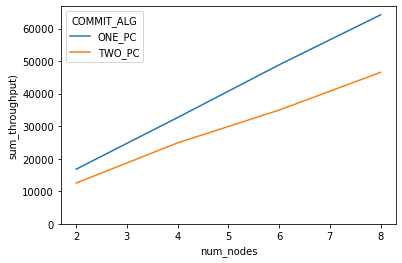

In [16]:
df2 = result.pivot(index='num_nodes', columns='COMMIT_ALG', values='sum_throughput')
print(df2)
plot = df2.plot()
plot.set_ylabel("sum_throughput)")
plot.set_ylim(bottom=0)
fig = plot.get_figure()
# fig.savefig("threads_latency.png")

In [19]:
latency = grouped['execute_phase (in us)', 'prepare_phase_1 (in us)', 'prepare_phase_2 (in us)','total_log_yes (in us)', 'commit_phase (in us)', 'abort (in us)'].mean().reset_index()
result = latency[latency['NUM_SERVER_THREADS'] == 28]

<ipython-input-19-42b7ab84fbbf>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  latency = grouped['execute_phase (in us)', 'prepare_phase_1 (in us)', 'prepare_phase_2 (in us)','total_log_yes (in us)', 'commit_phase (in us)', 'abort (in us)'].mean().reset_index()


   COMMIT_ALG  NUM_SERVER_THREADS  execute_phase (in us)  \
7      ONE_PC                  28               357.5666   
15     TWO_PC                  28               341.8860   

    prepare_phase_1 (in us)  prepare_phase_2 (in us)  total_log_yes (in us)  \
7                   2663.02                 0.141971               2293.580   
15                  2601.86                 0.179666               2109.622   

    commit_phase (in us)  abort (in us)  
7               0.878322       1.029035  
15            687.356800       1.269784  


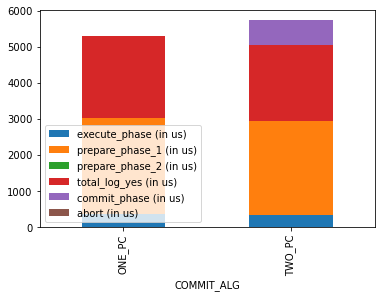

In [20]:
print(result)
result = result.drop(['NUM_SERVER_THREADS'], axis=1)
latency_plot = result.plot.bar(stacked='True', x='COMMIT_ALG')
fig = latency_plot.get_figure()
fig.savefig("latency_zipf09_std.png")